# HIST OF EXTRACTION OF SYMMETRIES

In [6]:
from template_csp import managetemp as mte
from template_csp.distances import dist1, dist2, dist3, levensthein_distance
import numpy as np
test_elements = ['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']

hyperparameters = { 
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "comp" : 1,
    "lev_red" : 0.9,
    "n_pairs" : 105,
}
all_temp = ['SSi_166', 'CF_164', 'NaSi_123', 'BeF_166', 'AlS_139', 'HSi_191', 'AlO_166', 'LiNa_187', 'MgP_123', 'HP_129', 'MgN_187', 'AlNa_141', 'AlSi_123', 'LiO_187', 'BeO_186', 'BLi_166', 'PSi_225', 'NO_160', 'ClP_129', 'BN_216', 'FSi_191', 'AlLi_227', 'BeCl_166', 'CH_164', 'AlF_191', 'AlB_166', 'BS_166', 'CCl_166', 'BP_216', 'LiSi_123', 'FP_129', 'BeCl_164', 'LiNa_194', 'FLi_194', 'CSi_216', 'LiMg_123', 'CLi_160', 'MgO_225', 'LiN_139', 'AlMg_123', 'CSi_186', 'BeS_119', 'ClNa_225', 'ClLi_194', 'NaS_123', 'ClLi_225', 'AlLi_123', 'NSi_156', 'FMg_164', 'HNa_225', 'HLi_225', 'CF_166', 'AlN_216', 'MgNa_123', 'AlB_156', 'BN_186', 'AlSi_141', 'FNa_225', 'CP_164']

hist_temp = {}
hist_sg = {} 
hist_sg_with_repetion = {}
lenfinalset = np.zeros(50)


for i in range(50):
    template_set = mte.TemplateSet(test_elements, f'./RANDOM/FULL50sets/20/TemplateSet_{i}')
    reduction_set = mte.PairSet(template_set, test_elements, levensthein_distance, f'./RANDOM/FULL50sets/20/PairSet_{i}')

    final_set_idx = reduction_set.reduced_set(hyperparameters)
    final_set = [f'{template_set.couples[x][0][0]}{template_set.couples[x][0][1]}_{template_set.couples[x][1]}' for x in final_set_idx]
    sg_final_set = set([x.split('_')[1] for x in final_set])
    lenfinalset[i] = len(final_set)

    for temp in final_set:
        if temp in hist_temp.keys():
            hist_temp[temp] += 1
        else:
            hist_temp[temp] = 1
    
    for sg in sg_final_set:
        if sg in hist_sg.keys():
            hist_sg[sg] += 1
        else:
            hist_sg[sg] = 1
    
    for temp in final_set:
        sg = temp.split('_')[1]
        if sg in hist_sg_with_repetion.keys():
            hist_sg_with_repetion[sg] += 1
        else:
            hist_sg_with_repetion[sg] = 1

 

temp_names = np.array(list(hist_temp.keys()))
sg_names = np.array(list(hist_sg.keys()))
sg_with_repetion_names = np.array(list(hist_sg_with_repetion.keys()))

temp_values = np.array(list(hist_temp.values()))
sg_values = np.array(list(hist_sg.values()))
sg_with_repetion = np.array(list(hist_sg_with_repetion.values()))

sorted_idx_sg = np.argsort(sg_values)[::-1]
sorted_idx_temp = np.argsort(temp_values)[::-1]

temp_names = temp_names[sorted_idx_temp]
sg_names = sg_names[sorted_idx_sg]

sg_with_repetion = np.array([sg_with_repetion[np.where(sg_with_repetion_names == sg)[0][0]] for sg in sg_names])
temp_values = temp_values[sorted_idx_temp]
sg_values = sg_values[sorted_idx_sg]

print('Size of the final set:', np.mean(lenfinalset), np.std(lenfinalset))

Size of the final set: 8.86 1.4561593319413917


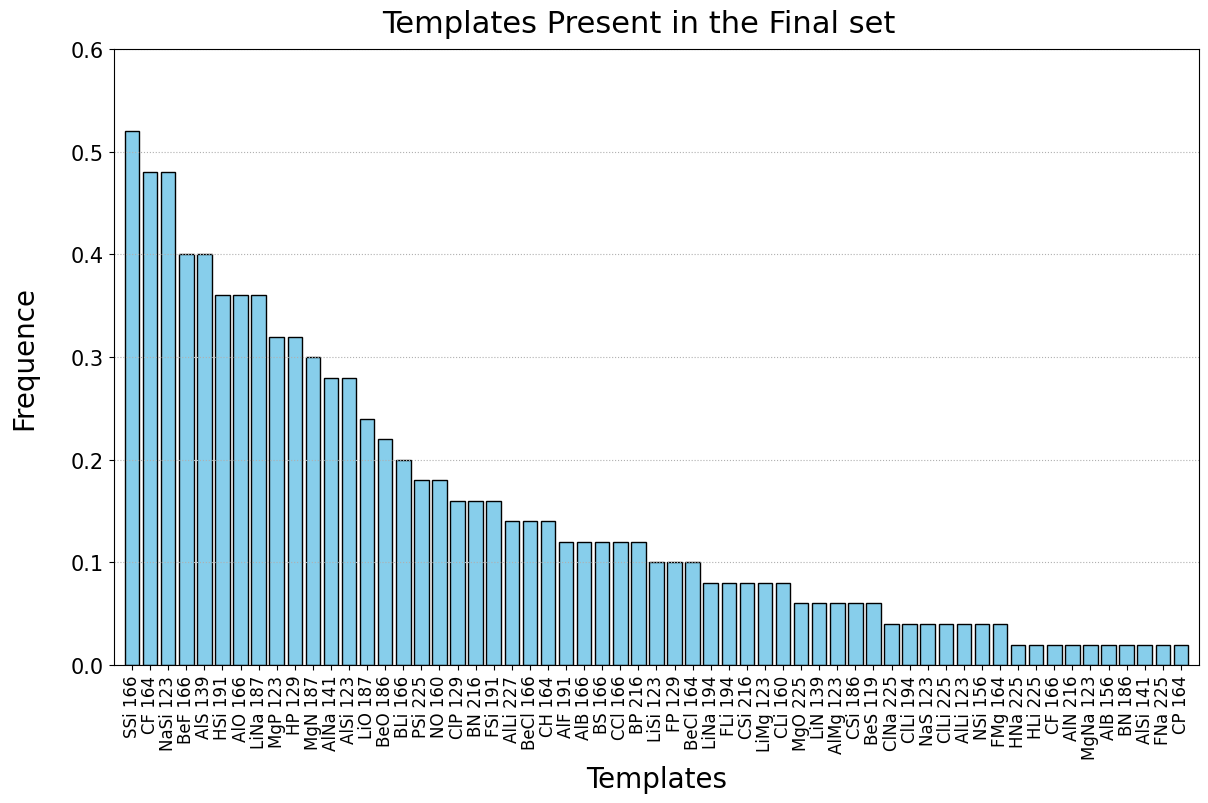

First 9 templates: ['SSi_166' 'CF_164' 'NaSi_123' 'BeF_166' 'AlS_139' 'HSi_191' 'AlO_166'
 'LiNa_187' 'MgP_123']


In [16]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1, figsize=(14, 8))
fig.suptitle('Templates Present in the Final set', fontsize=22, y=0.93)
xticks = [f'{x.split("_")[0]} {x.split("_")[1]}' for x in temp_names]

ax1.bar(xticks, temp_values/50, color='skyblue', edgecolor='black', lw=1)
ax1.set_ylabel('Frequence', fontsize=20)
ax1.yaxis.set_label_coords(-0.07, 0.5)

ax1.set_xlabel('Templates', fontsize=20, y=-0.1)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks, fontsize=12, rotation=90)
ax1.set_ylim(0, 0.8)
ax1.set_xlim(-1, len(temp_names))

ax1.grid(True, ls=':', axis='y')
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax1.set_yticklabels(np.round(np.arange(0, 1.1, 0.1), decimals=1), fontsize=15)
ax1.set_ylim(0, 0.6)


fig.savefig('TemplatesPresent.png', bbox_inches='tight')
plt.show()

print('First 9 templates:', temp_names[:9])


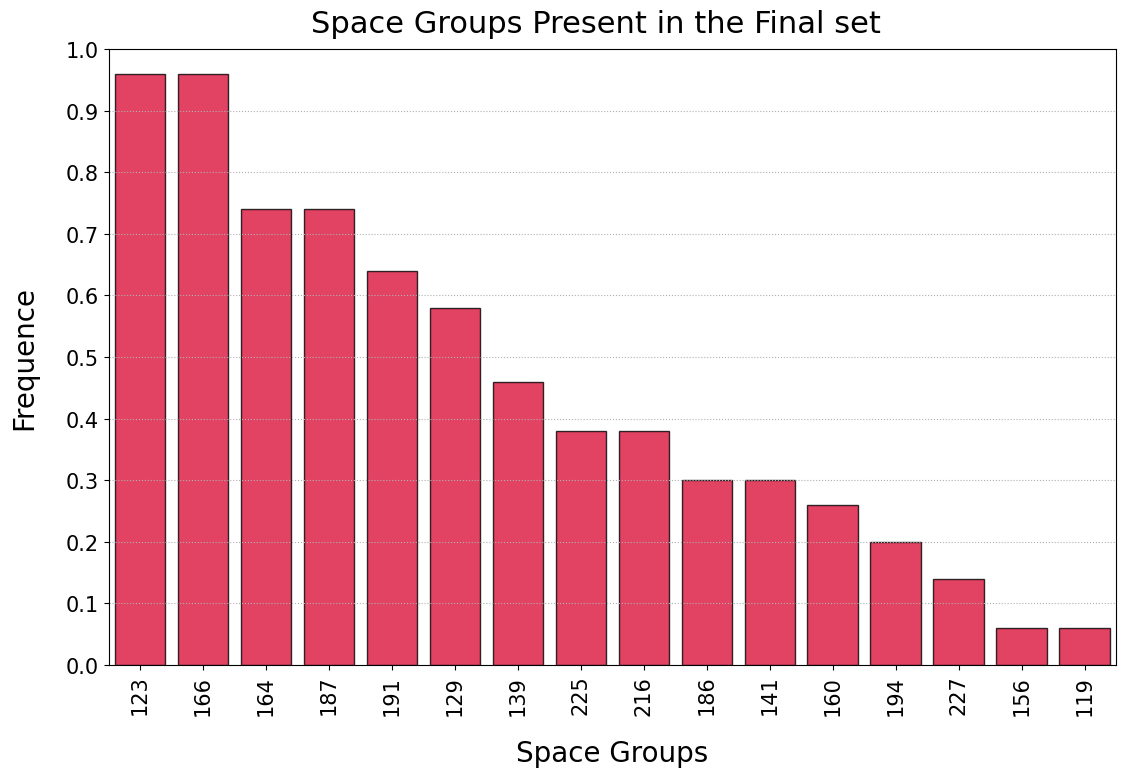

In [17]:
fig, ax2 = plt.subplots(1, 1, figsize=(13, 8))

fig.suptitle('Space Groups Present in the Final set', fontsize=22, y=0.93)

ax2.bar(sg_names, sg_values/50, color='crimson', alpha = 0.8, edgecolor='black', lw=1)
ax2.set_ylabel('Frequence', fontsize=20)
ax2.set_xlabel('Space Groups', fontsize=20)
ax2.xaxis.set_label_coords(0.5, -0.12)
ax2.yaxis.set_label_coords(-0.07, 0.5)

xticks = sg_names

ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks, fontsize=15, rotation=90)
ax2.set_xlim(-0.5, len(sg_names)-0.5)

ax2.grid(True, ls=':', axis='y')
ax2.set_yticks(np.arange(0, 1.1, 0.1))
ax2.set_yticklabels(np.round(np.arange(0, 1.1, 0.1), decimals=1), fontsize=15)
ax2.set_ylim(0, 1)


fig.savefig('SpaceGroupsPresent.png', bbox_inches='tight')

plt.show()